In [9]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Input
e  = ctrl.Antecedent(np.linspace(-np.pi/2, np.pi/2, 1000), 'e')
de = ctrl.Antecedent(np.linspace(-np.pi/4, np.pi/4, 1000), 'de')

# Output 
F = ctrl.Consequent(np.linspace(-100, 100, 1000), 'F')

# Membership functions
e['LN'] = fuzz.trimf(e.universe,[-np.pi/2, -np.pi/2, -np.pi/4])
e['SN'] = fuzz.trimf(e.universe,[-np.pi/2, -np.pi/4, 0])
e['ZO'] = fuzz.trimf(e.universe,[-np.pi/4, 0, np.pi/4])
e['SP'] = fuzz.trimf(e.universe,[0, np.pi/4, np.pi/2])
e['LP'] = fuzz.trimf(e.universe,[np.pi/4, np.pi/2, np.pi/2])

de['LN'] = fuzz.trimf(de.universe,[-np.pi/4, -np.pi/4, -np.pi/8])
de['SN'] = fuzz.trimf(de.universe,[-np.pi/4, -np.pi/8, 0])
de['ZO'] = fuzz.trimf(de.universe,[-np.pi/8, 0, np.pi/8])
de['SP'] = fuzz.trimf(de.universe,[0, np.pi/8, np.pi/4])
de['LP'] = fuzz.trimf(de.universe,[np.pi/8, np.pi/4, np.pi/4])

F['LN'] = fuzz.trimf(F.universe,[-100, -100, -50])
F['SN'] = fuzz.trimf(F.universe,[-100, -50, 0])
F['ZO'] = fuzz.trimf(F.universe,[-50, 0, 50])
F['SP'] = fuzz.trimf(F.universe,[0, 50, 100])
F['LP'] = fuzz.trimf(F.universe,[50, 100, 100])

# Rules
rule = []


rule.append(ctrl.Rule(e['LN'] & de['LN'], F['LN']))
rule.append(ctrl.Rule(e['LN'] & de['SN'], F['LN']))
rule.append(ctrl.Rule(e['LN'] & de['ZO'], F['SN']))
rule.append(ctrl.Rule(e['LN'] & de['SP'], F['SN']))
rule.append(ctrl.Rule(e['LN'] & de['LP'], F['ZO']))

rule.append(ctrl.Rule(e['SN'] & de['LN'], F['LN']))
rule.append(ctrl.Rule(e['SN'] & de['SN'], F['SN']))
rule.append(ctrl.Rule(e['SN'] & de['ZO'], F['SN']))
rule.append(ctrl.Rule(e['SN'] & de['SP'], F['ZO']))
rule.append(ctrl.Rule(e['SN'] & de['LP'], F['SP']))


rule.append(ctrl.Rule(e['ZO'] & de['LN'], F['SN']))
rule.append(ctrl.Rule(e['ZO'] & de['SN'], F['SN']))
rule.append(ctrl.Rule(e['ZO'] & de['ZO'], F['ZO']))
rule.append(ctrl.Rule(e['ZO'] & de['SP'], F['SP']))
rule.append(ctrl.Rule(e['ZO'] & de['LP'], F['SP']))

rule.append(ctrl.Rule(e['SP'] & de['LN'], F['ZO']))
rule.append(ctrl.Rule(e['SP'] & de['SN'], F['ZO']))
rule.append(ctrl.Rule(e['SP'] & de['ZO'], F['SP']))
rule.append(ctrl.Rule(e['SP'] & de['SP'], F['SP']))
rule.append(ctrl.Rule(e['SP'] & de['LP'], F['LP']))

rule.append(ctrl.Rule(e['LP'] & de['LN'], F['SP']))
rule.append(ctrl.Rule(e['LP'] & de['SN'], F['SP']))
rule.append(ctrl.Rule(e['LP'] & de['ZO'], F['SP']))
rule.append(ctrl.Rule(e['LP'] & de['SP'], F['LP']))
rule.append(ctrl.Rule(e['LP'] & de['LP'], F['LP']))


#Control system
force_control = ctrl.ControlSystem(rule)
force_simulation = ctrl.ControlSystemSimulation(force_control)



49.999899699298474


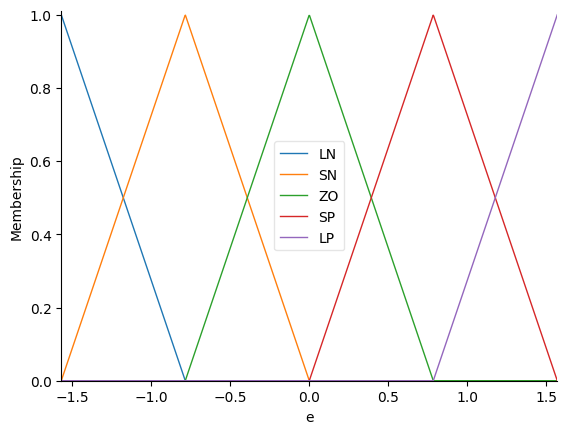

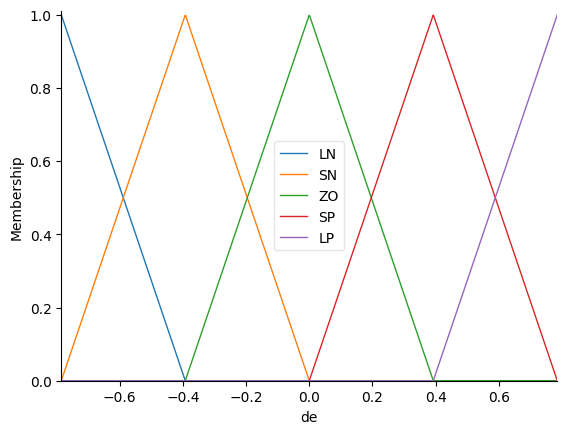

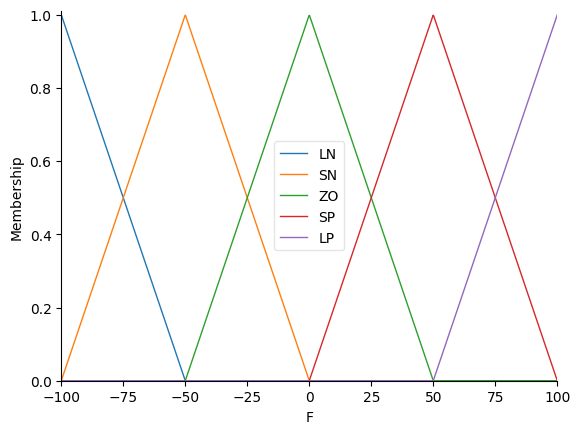

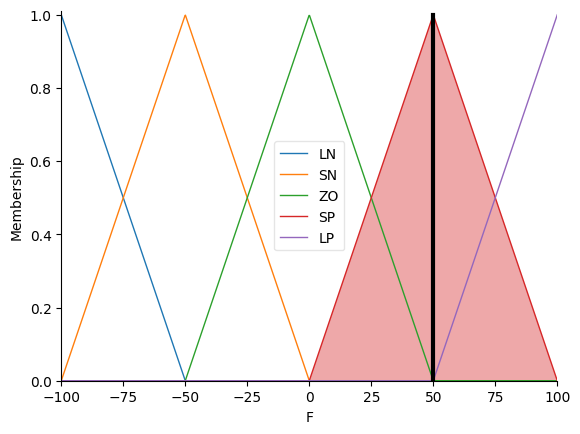

In [10]:
e.view()
de.view()
F.view()

# Compute
force_simulation.input['e'] = 90*np.pi/180
force_simulation.input['de'] = -90*np.pi/180

force_simulation.compute()

print(force_simulation.output['F'])

# Force
F.view(sim = force_simulation)